# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:** No, the Smartcab does not move at all during the stimulation. It receives a positive reward when it makes a correct decision and a negative reward for incorrect decisions. A positive reward was received for staying idle in the red light and a negative reward was received for staying idle when the light was green and there is no oncoming traffic.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
- **`agent.py`**

**learning** - This flag is set to True if we want to force the driving agent to use Q-learning where it learns from the rewards and punishments received from the actions.

**alpha** - It is the learning rate ranges from 0.0 - 1.0. When alpha=0 there is no learning takes place i.e  the agent does not update the entries in Q-Table according to the rewards and punishments. (By default it is set to 0.5)

**update_display** - This is the time difference between the actions (in seconds) by default set to 2.0 seconds. A small value for update_display means the display will be updated more frequently. 




- **`environment.py`**

act() function of the environment class is called when an agent performs an action.




- **`simulator.py`**

render() function will provide the Graphical display of the simulation and it is responsible for the movement of traffic in the Pygame window. Whereas render_text() provide us the non-GUI display of the simulation and it gives us the output of each step in the terminal.

- **`planner.py`** 

next_waypoint() function will consider the East-West direction first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


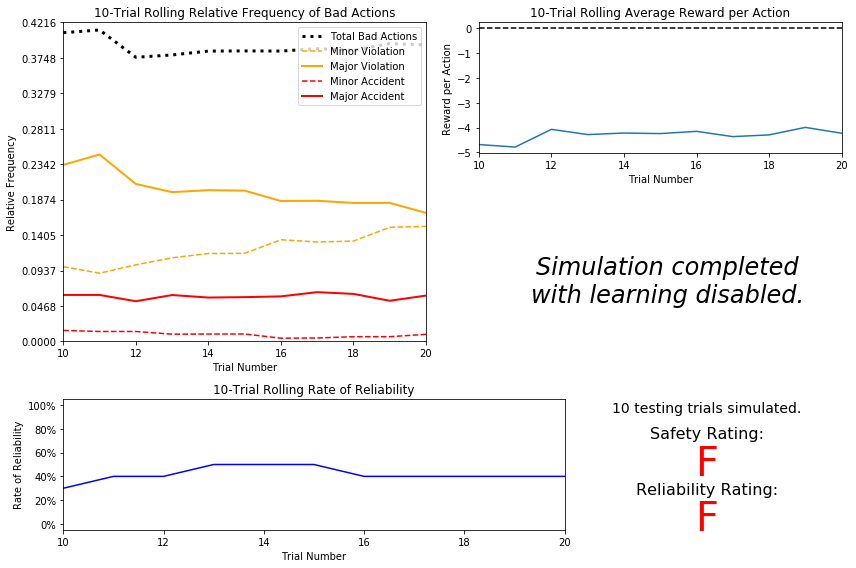

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**
Around 40% of the time driving agent makes bad decisions and nearly 12.5% (total 5% major accidents approx.) of them causes major accidents and 5% (total 2% minor accidents approx.) causes minor accidents.

It can be seen from the graph of Rate of Reliability vs Trial Number that the agent achieves success around 30-40% of the time when the agent is driving randomly.  It makes sense as there are more chances of failure while random driving then the success.

The agent receives a positive reward for every correct action and a negative reward for every wrong action. From rolling average of reward, it can be seen that average reward for the agent is around -5 for the trials. The agent receives a large negative reward of -40 (approx) for major accidents which occur 5% of the time and a reward of -10 (approx) for major violations. Given the negative rewards for the wrong actions the agent also receives positive rewards for correct actions so that the average is -5. It indicates that the reward has not been penalized heavily.

With the increase in the number of trials, the outcome of results does not change significantly as the agent is not learning and each trail is random.

This smartcab is surely neither safe nor reliable for its passengers as it can be seen from the letter-grade system for measuring safety and reliability that the cab receives the lowest grade i.e F when it fails to reach the destination at least 60% of the time and causes one major accident. In this case, the cab meets with the major accidents 5% of the time and achieves 50% reliability.



-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

The features  which are most relevant for learning safety and efficiency are:

1. light - with the color of the light it can be determined whether the agent should move or be idle so it can follow the traffic rules.

2. left - it determines when the agent is allowed to take a left turn if there is a vehicle present and its intention is to move taking a left turn may cause major accidents.

3. waypoint - waypoint is an important feature for the efficiency of the cab, the cab heading direction must be known by the agent so it may head in the correct direction.

4. oncoming - It is an important feature when the smartcab is trying to take a left turn. The smartcab must avoid going on the road with oncoming traffic, if there is an oncoming traffic it may cause a major accident.



The features which are not relevant for the safety and efficiency are:

1. right - In this environment, this feature is not important since it does not play a role in the rules of the grid world traffic.

2. deadline - Deadline feature is not relevant to the safety and reliability scores of the smartcab, it surely can improve the time the smartcab take to reach the destination but it may be difficult to learn.



### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:** The size of the state space if the state is defined using the features I have selected: 


| Feature|            Possible States| Number of states |
|--------|---------------------------|------------------|
|   Light|                 red, green|                 2|
|    Left| none, forward, left, right|                 4|
|Waypoint|       forward, left, right|                 3|
|Oncoming| none, forward, left, right|                 4|


The number of possible combinations of the states --> 2 x 4 x 3 x 4 --> 96 states

I think 96 is a decent number of states and the driving agent could learn a policy for each possible state within a resonable number of training trails.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

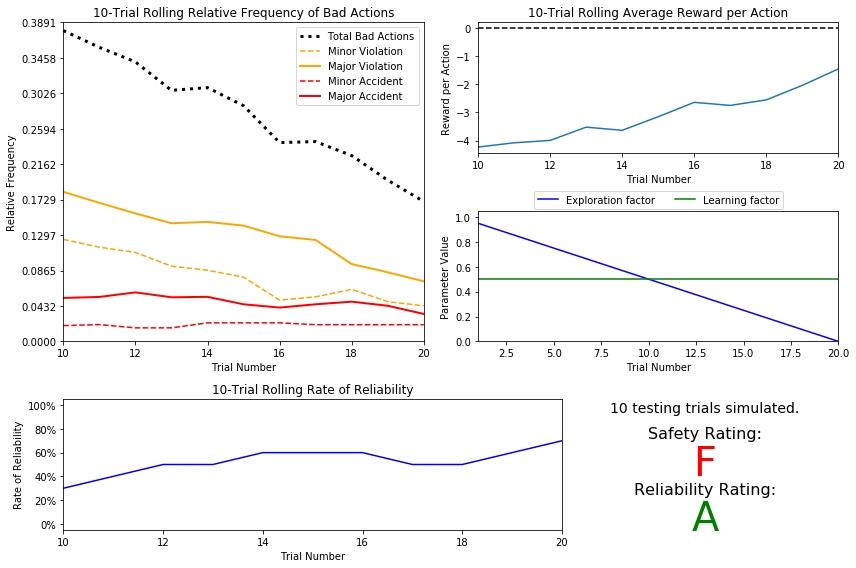

In [20]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**
- There is no observation which is similar between the basic driving agent and the default Q-Learning agent except the relative frequency of the minor and major accident shows a little change.

- The driving agent requires 20 trials before testing and it makes sense as the epsilon was decremented 0.05 with each trail and it takes 20 trial for epsilon to reach 0.

- The constant decaying function implemented for the exploration factor was represented accurately in the parameters panel.

- With the increase in the number of training trials, the number of bad actions decreases from 38% to 18% (approx) whereas, the average reward increases from -4 to -1.5 (approx).


**Observations from the 10-Trial rolling relative frequency of bad actions:**

The relative frequency of total bad actions decreases from 38% to 18% (approx) in the default Q-Learning agent with the increase in the number of trails.

Minor violation and major violation shows a decrease of 10% and 6% (approx) respectively.

Whereas relative frequency of minor accident and the major accident remains almost unchanged.

**10-trial Rolling rate of Reliability:**

The defalut Q-Learning agent archives a reliability of around 70% by the time of completion of 20 trials as compared to the 40% reliability of the basic agent.

**10-Trial Rolling Average Reward per Action:**

The rate of reward increases from -4  to -1.5 by the end of 20 the trials, in the case of basic driving agent the reward remains almost constant around -4.


**Exploration factor and Learning factor:**

Exploration factor was decremented 0.05 with each trail and it takes 20 trial for Exploration factor to reach 0.

Learning factor remains constant at 0.5.







**Reliability Rating shows a great improvement from Rating "F" for the initial driving agent to Rating "A" for default Q-Learning agent but the safety Rating remains same as in the initial driving agent i.e. Rating "F".
The smartcab still considered unsafe for its passengers.**






-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

# 1. epsilon = alpha**t

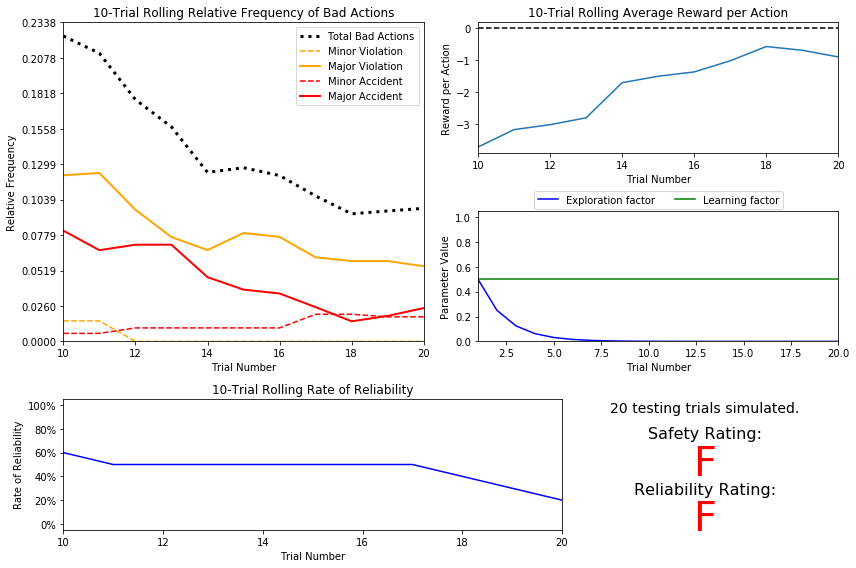

epsilon = alpha**.t
Alpha = 0.5
tolerance = 0.05
n-test = 20


In [47]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')
print ("epsilon = alpha**.t")
print ("Alpha = 0.5")
print("tolerance = 0.05")
print("n-test = 20")

# 2. epsilon = 1.0/(t**2)

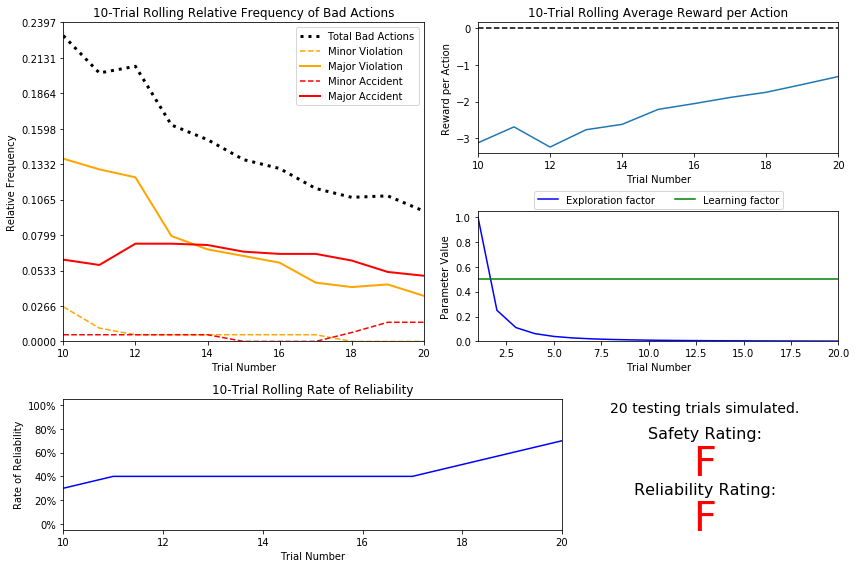

epsilon = 1.0/(t**2)
Alpha = 0.5
tolerance = 0.05
n-test = 20


In [48]:
vs.plot_trials('sim_improved-learning.csv')
print ("epsilon = 1.0/(t**2)")
print ("Alpha = 0.5")
print("tolerance = 0.05")
print("n-test = 20")

# 3. epsilon = epsilon*0.80

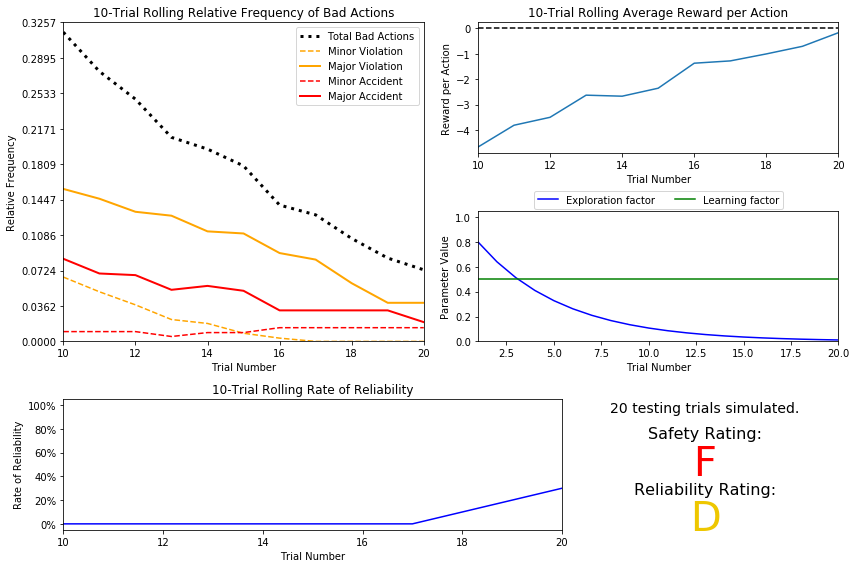

epsilon = epsilon*0.80
Alpha = 0.5
tolerance = 0.05
n-test = 20


In [92]:
vs.plot_trials('sim_improved-learning.csv')
print ("epsilon = epsilon*0.80")
print ("Alpha = 0.5")
print("tolerance = 0.05")
print("n-test = 20")

# 4. epsilon = COS(alpha*t)

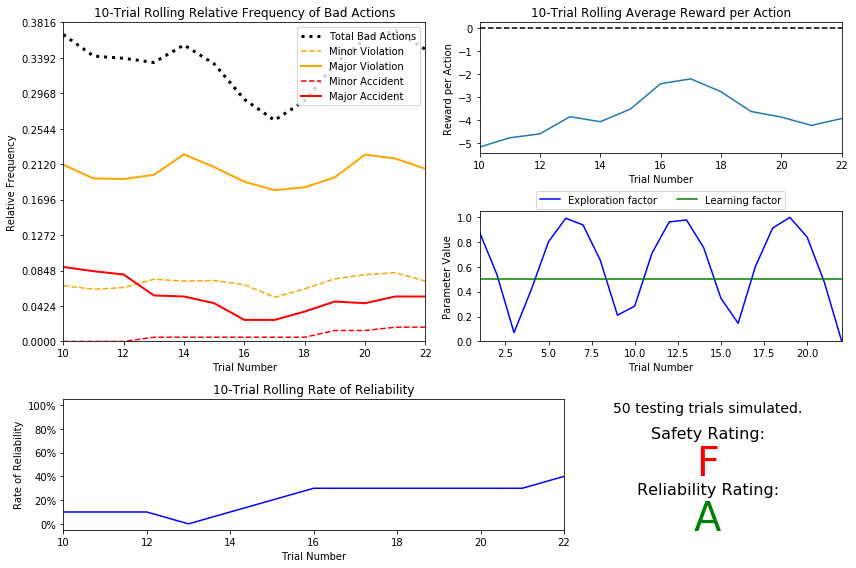

epsilon = math.fabs(math.cos(alpha*t))
Alpha = 0.5
Tolerance = 0.05
n-test = 50


In [95]:
vs.plot_trials('sim_improved-learning.csv')
print ("epsilon = math.fabs(math.cos(alpha*t))")
print ("Alpha = 0.5")
print("Tolerance = 0.05")
print("n-test = 50")

# 5.

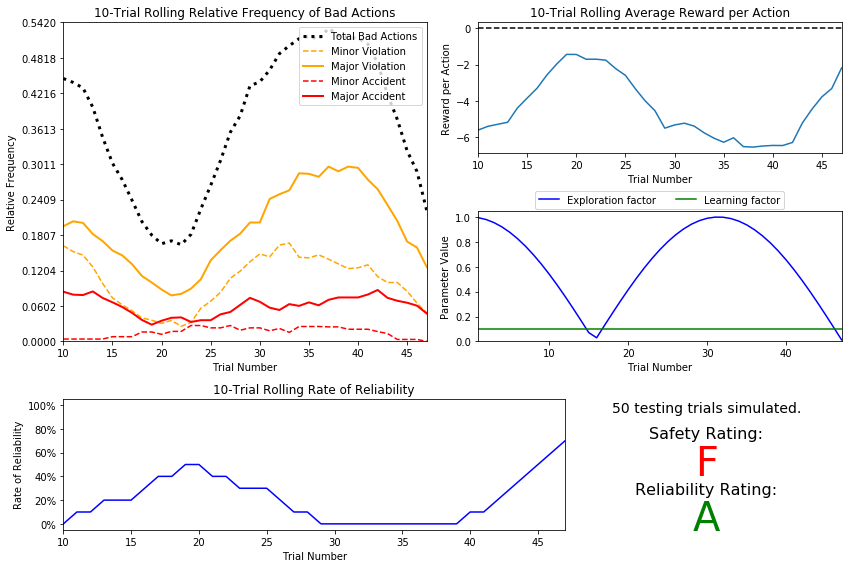

epsilon = epsilon*0.80
Alpha = 0.5
Epsilon-toerance = 0.01
n-test = 50


In [97]:
vs.plot_trials('sim_improved-learning.csv')
print ("epsilon = epsilon*0.80")
print ("Alpha = 0.1")
print("Epsilon-toerance = 0.01")
print("n-test = 50")

# 6.

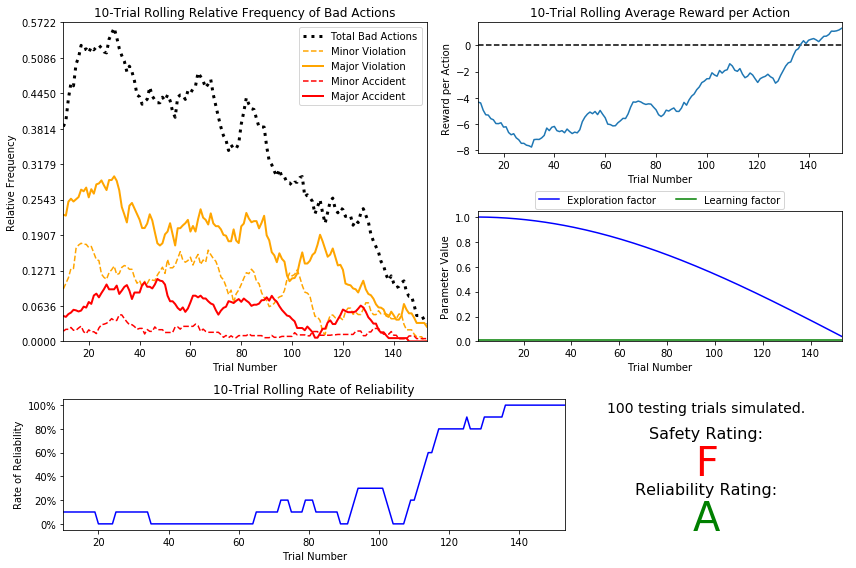

epsilon = math.fabs(math.cos(alpha*t))
Alpha = 0.01
Tolerance= 0.05
n-test = 100


In [100]:
vs.plot_trials('sim_improved-learning.csv')
print ("epsilon = math.fabs(math.cos(alpha*t))")
print ("Alpha = 0.01")
print("Tolerance= 0.05")
print("n-test = 100")

# 7.

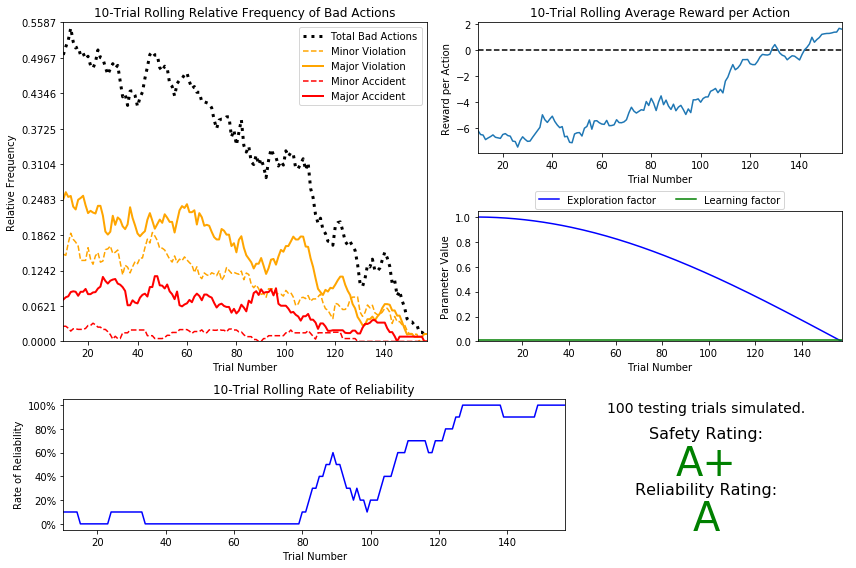

epsilon = math.fabs(math.cos(alpha*t))
Alpha = 0.01
tolerance = 0.01
n-test = 100


In [104]:
vs.plot_trials('sim_improved-learning.csv')
print ("epsilon = math.fabs(math.cos(alpha*t))")
print ("Alpha = 0.01")
print("tolerance = 0.01")
print("n-test = 100")

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

ϵ=cos(at) was used as the decaying function for the exploration factor, where a is the learning rate and t is the number of the trail.

It requires approximately 150 trials for the agent before beginning the testing.

I choose 0.01 for alpha and 0.001 for the tolerance.

First I use default values for alpha and tolerance (0.5 and 0.05 respectively) but the agent did not perform well for safety ratings and receives 'F' rating for safety and 'A' for reliability. By observing the result of Agent no. 4 it can be seen that there is an increasing trend in the rate of reliability and the average reward per action, but it seems that the agent needs more time to explore the environment as the reliability of the agent is around 40% .

By lowering the alpha to 0.1 for Agent no. 5 an improvement in reliability can be observed (from 40% to 60%) but still, the number of trials was not sufficient for the agent to adapt to the environment.

Agent 7 use approx 150 trials with alpha = 0.01 and tolerance set to 0.001 and perform very well with an 'A+' rating for safety and an 'A' rating for reliability.


This Q-Learning agent achieves a reliability of 100% and an average reward of almost +2 which is a great improvement when compared with the default Q-Learning agent which struggle to achieve the accuracy of 70% with an average reward of -1.5.

As the agent receives  'A+' and 'A' rating for safety and reliability respectively for 100 testing trials, in my opinion, the driving agent successfully learned an appropriate policy and gives the satisfactory rating for safety and reliability.


### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 



**1.** The best set of instructions given what we know about the environment is to Maximize the driving agent's safety and reliability.  Which means that at each step the smartcab should choose the action which provides the maximum reward. The goal of the agent is to commit no traffic violations and always choose a correct action. The agent should commit to reaches the destination in time for 100% of the trip.

**2.** The policy is correct for most of the states, however, there are some states for which the policy is suboptimal.

#### State(waypoint, light, left, oncoming)
**e.g**   ('right', 'green', 'forward', 'forward')

 -- forward : 0.01

-- left : 0.02

-- right : 0.02

-- None : -0.05

In this state, the cab's waypoint is right however left and right have the same value i.e. 0.02, It is equally likely that the cab will turn left in this state which is suboptimal policy.


**3.** Some examples from the recorded Q-table which demonstrate that the smartcab learned the optimal policy:

#### State(waypoint, light, left, oncoming)
('left', 'green', 'forward', 'left')

-- forward : 0.03

-- left : 0.11

-- right : 0.04

-- None : -0.15

In this example, the waypoint of the cab is left, the traffic light is green and the intended directions of travel for the vehicles left to the smartcab and across the street are forward and left respectively. In this situation, the cab should turn left.

The agent has chosen the optimal policy in this case.

#### State(waypoint, light, left, oncoming)
('left', 'red', 'left', 'forward')
 
 -- forward : -0.10
 
 -- left : -0.40
 
 -- right : 0.01
 
 -- None : 0.10
 
 The waypoint of smartcab is left in this example, but the light is red. A left turn is not allowed when the light is red, so the cab should stay where it is.

The agent chooses an optimal policy in this case.


**4.** The entry where the policy is not optimal.

#### State(waypoint, light, left, oncoming)
('left', 'green', 'left', 'forward')
 
 -- forward : 0.00
 
 -- left : 0.16
 
 -- right : 0.02
 
 -- None : -0.09

Here the smartcab wants to take a left turn but the direction of oncoming traffic is forward. This policy of turning left is suboptimal as taking a left turn when there is a vehicle coming straight through the intersection may cause an accident. 



-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.